SPARKS FOUNDATION<br>
NAME:- ANUBHAV TIWARI<br>
TASK 2 PREDICTION USING UNSUPERVISED ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("C:\\Users\\pc\\Desktop\\csv datasets\\Iris.csv")

In [51]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


PREPROCESSING THE DATASET

In [52]:
data = data.drop('Id',axis = 1)

In [53]:
data = data.rename(columns={'SepalLengthCm':'sl','SepalWidthCm':'sw','PetalLengthCm':'pl','PetalWidthCm':'pw'},inplace=False)

In [54]:
data.head(10)

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
data['Species'].describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: Species, dtype: object

# we will use kmeans clustering to find the groups of species formed

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [58]:
x=data.iloc[:,[0,1,2,3]].values

# now we will use elbow method to find the optimal no. of clusters for our data

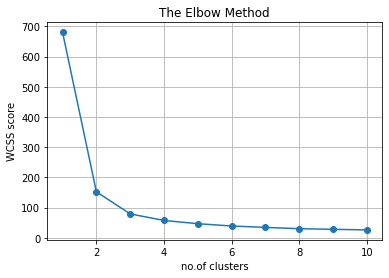

In [59]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("no.of clusters")
plt.ylabel("WCSS score")
plt.title("The Elbow Method")
plt.grid()
plt.show()

#PREDICTING USING KMEANS ALGORITHM

In [60]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y = kmeans.fit_predict(x)

In [61]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# vizualisation of clusters

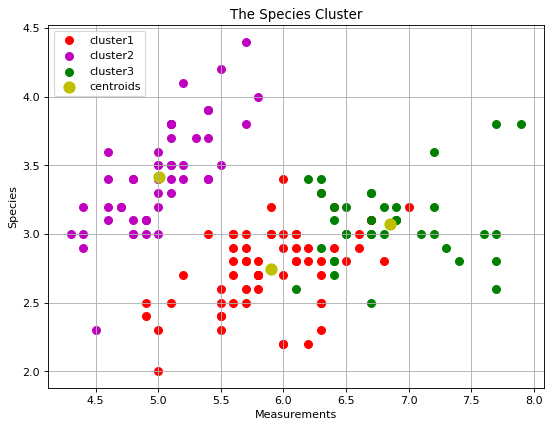

In [68]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)


plt.scatter(x[y==0,0],x[y==0,1],color = 'r',s=50,label= 'cluster1')
plt.scatter(x[y==1,0],x[y==1,1],color = 'm',s=50,label= 'cluster2')
plt.scatter(x[y==2,0],x[y==2,1],color = 'g',s=50,label= 'cluster3')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='y',s=100,label='centroids')


plt.xlabel('Measurements')
plt.ylabel('Species')
plt.title('The Species Cluster')
plt.legend(loc=2)
plt.grid()
plt.show()